<h1>1. Выбор данных</h1>

Abalone Data Set - http://archive.ics.uci.edu/ml/datasets/Abalone


<h1>2. Импорт библиотек</h1>

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PowerTransformer
from sklearn.svm import SVC

<h1>3. Описание данных</h1>

Предсказание возраста морского ушка (моллюски) по физическим измерениям. Возраст морского ушка определяется путем разрезания раковины через конус, окрашивания ее и подсчета количества колец под микроскопом - скучная и трудоемкая задача. Другие измерения, которые легче получить, используются для прогнозирования возраста. Для решения проблемы может потребоваться дополнительная информация, такая как погодные условия и местоположение (следовательно, наличие продуктов питания).

**Название / Тип Данных / Единица измерения / Описание**

* Sex - Пол / номинальный / -- / M (мужчина), F (женщина) и I (младенец)
* Length - Длина / непрерывная / мм / Измерение самой длинной оболочки
* Diameter - Диаметр / непрерывный / мм / перпендикулярный длине
* Height - Высота / непрерывная / мм / с мясом в скорлупе
* Whole_weight - Весь вес / непрерывный / грамм / целое морское ушко
* Shucked_weight - Очищенный вес / непрерывный / грамм / вес мяса
* Viscera_weight - Вес внутренних органов / непрерывный / грамм / вес кишечника (после кровотечения)
* Shell_weight - Вес скорлупы / непрерывный / грамм / после сушки
* Rings - Кольца / целое число / -- / +1.5 дает возраст в годах

# Подготовка данных

In [143]:
# Импортируем данные
names = [
    'Sex', 'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

df = pd.read_csv('abalone.csv', names=names)
df.head(10)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [144]:
df['Whole_weight_class'] = np.where(df.Whole_weight > 1, 1, 0)

In [145]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1


<h1>4. Подготовка данных</h1>

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length              4177 non-null   float64
 2   Diameter            4177 non-null   float64
 3   Height              4177 non-null   float64
 4   Whole_weight        4177 non-null   float64
 5   Shucked_weight      4177 non-null   float64
 6   Viscera_weight      4177 non-null   float64
 7   Shell_weight        4177 non-null   float64
 8   Rings               4177 non-null   int64  
 9   Whole_weight_class  4177 non-null   int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 326.5+ KB


In [147]:
df.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings,Whole_weight_class
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.352167
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.477703
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000


In [148]:
target = "Whole_weight_class"
features = [
    'Length', 'Diameter',
    'Height', 'Whole_weight', 'Shucked_weight',
    'Viscera_weight', 'Shell_weight', 'Rings'
]

<Axes: >

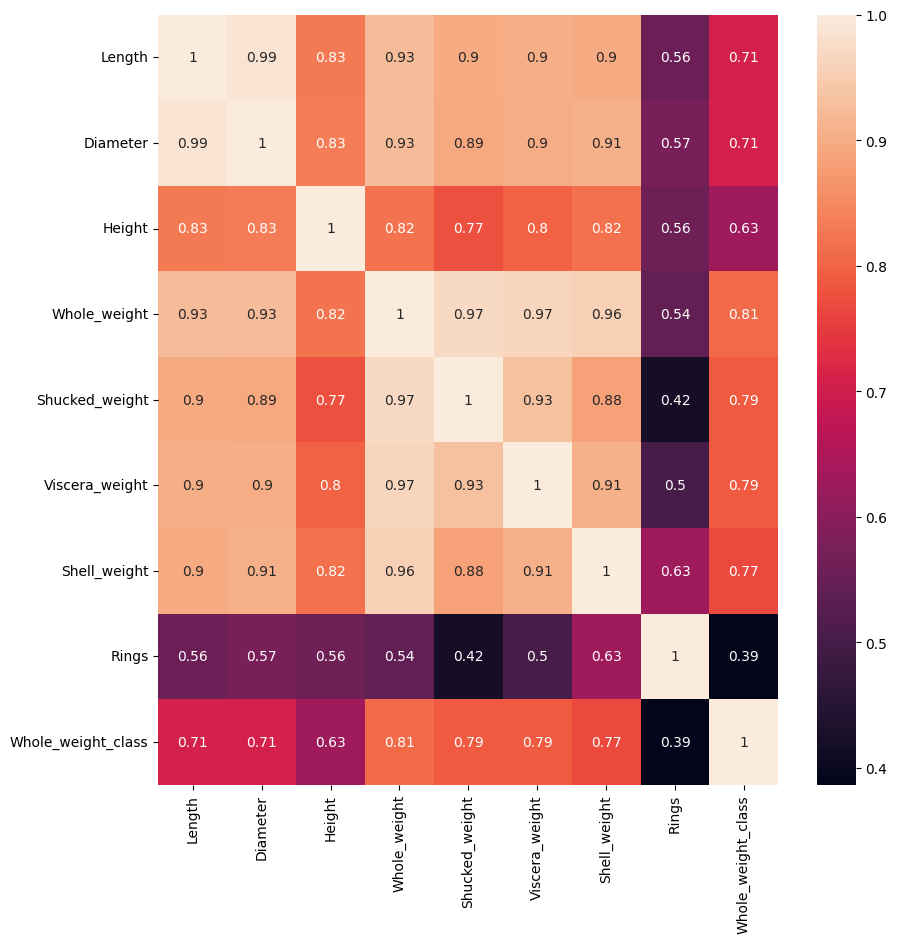

In [149]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True)

5.

Выбираем в качестве факторов Perimeter и Major_Axis_Length тк у них наивысшая корелляция с Class

In [150]:
current_feature = ["Height","Shucked_weight"]

In [151]:
cdf = df[['Whole_weight_class', 'Height','Shucked_weight']]
cdf

,Whole_weight_class,Height,Shucked_weight
0,0,0.095,0.2245
1,0,0.090,0.0995
2,0,0.135,0.2565
3,0,0.125,0.2155
4,0,0.080,0.0895
...,...,...,...
4172,0,0.165,0.3700
4173,0,0.135,0.4390
4174,1,0.205,0.5255
4175,1,0.150,0.5310


In [152]:
train, test = train_test_split(cdf, test_size=0.25, random_state=19)
train.shape, test.shape

((3132, 3), (1045, 3))

In [153]:
X_train, y_train = train[current_feature], train[target]
X_train.shape, y_train.shape

((3132, 2), (3132,))

In [154]:
X_test, y_test = test[current_feature], test[target]
X_test.shape, y_test.shape

((1045, 2), (1045,))

In [155]:
X_train = X_train.values.reshape(2515,2)
y_train = y_train.values.reshape(2515,1)
X_test = X_test.values.reshape(839,2)
y_test = y_test.values.reshape(839,1)

ValueError: cannot reshape array of size 6264 into shape (2515,2)

Text(0, 0.5, 'Shucked_weight')

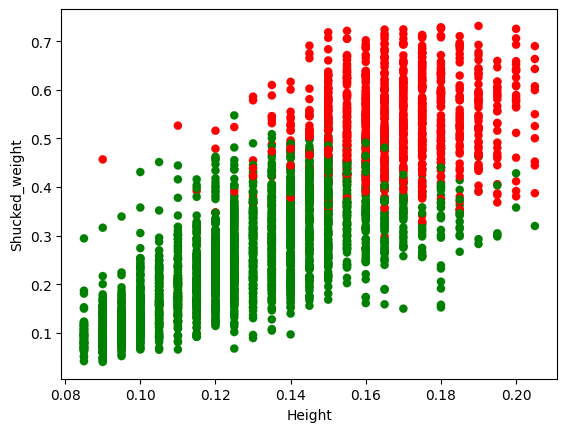

In [ ]:
plt.figure(1)
color = ['green' if e == 0 else 'red' for e in cdf[target]]
plt.scatter(cdf['Height'], cdf['Shucked_weight'], color = color, linewidths=0.1)
plt.xlabel('Height')
plt.ylabel('Shucked_weight')


In [ ]:
model = SVC()
model.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
y_test[:10]

array([[0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
model.predict(X_test[:10])

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
X_test[:10]

array([[0.09  , 0.1225],
       [0.18  , 0.342 ],
       [0.15  , 0.4515],
       [0.205 , 0.5995],
       [0.17  , 0.6035],
       [0.19  , 0.6615],
       [0.1   , 0.132 ],
       [0.1   , 0.124 ],
       [0.155 , 0.315 ],
       [0.13  , 0.343 ]])

In [ ]:
model.score(X_test,y_test.astype('int'))

0.9404052443384983

In [ ]:
mean_absolute_error(y_test,model.predict(X_test))

0.05959475566150179

In [ ]:
mean_squared_error(y_test,model.predict(X_test))

0.05959475566150179